1. Importing Necessary Library

In [ ]:
import pandas as pd # Importing all the necessary libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import re
import string

2. Examining the data


In [ ]:
sentiment_df = pd.read_csv('/content/sentimentdataset.csv') # Examine the dataset
sentiment_df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


# Remove whitespace
In exploratory data analysis (EDA), removing whitespace usually refers to cleaning up any trailing or leading spaces in the data. Here are some steps you can take to remove whitespace during your EDA process:

Identify columns with whitespace: Look for columns that may have leading or trailing spaces in the data. You can use functions like .str.strip() in pandas to remove leading and trailing whitespace from strings.

Remove leading and trailing whitespace: You can use the .str.strip() method in pandas to remove leading and trailing whitespace from string columns.


In [ ]:
sentiment_df['Platform'] = sentiment_df['Platform'].str.strip() # Remove whitespace
sentiment_df['Platform'].value_counts()

,count
Platform,
Instagram,258
Twitter,243
Facebook,231


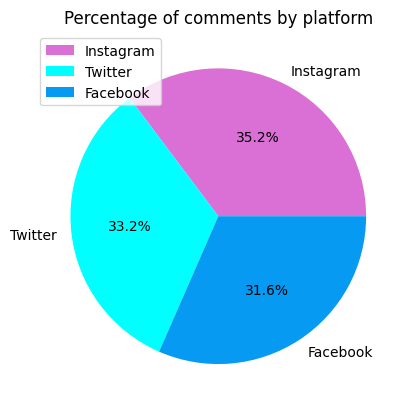

In [ ]:
platform_names = ["Instagram", "Twitter", "Facebook"] # Plots pie-chart of the propotions of comments by platform
plt.pie(sentiment_df['Platform'].value_counts(), labels = platform_names, autopct='%1.1f%%',
       colors=["orchid", "cyan", "#069AF3"])
plt.title("Percentage of comments by platform")
plt.legend(platform_names, loc= 'upper left')


#to clean the 'Country' column in a dataframe called sentiment_df by removing leading and trailing whitespaces, and then obtaining the value counts of each country.

In [ ]:
sentiment_df['Country'] = sentiment_df['Country'].str.strip()
sentiment_df['Country'].value_counts()

,count
Country,
USA,188
UK,143
Canada,135
Australia,75
India,70
Brazil,17
France,16
Japan,15
Germany,14


<Axes: xlabel='Country'>

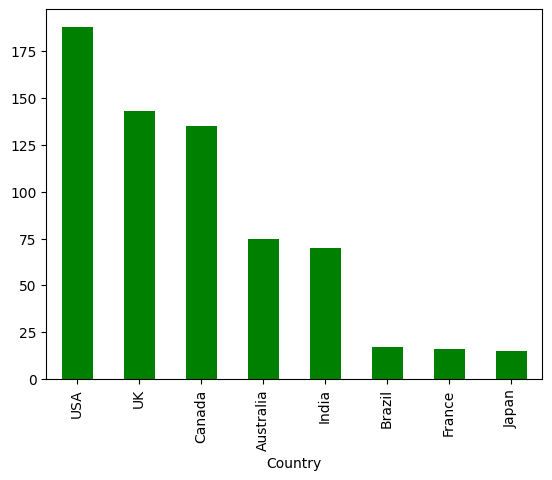

In [ ]:
sentiment_df['Country'].value_counts().nlargest(8).plot(kind='bar', color=["green"]) # Bar-chart showing comments per country

#to display the value counts for the 'Sentiment' column in a dataframe called sentiment_df.

In [ ]:
sentiment_df['Sentiment'].value_counts()
sentiment_df['Sentiment'].value_counts()

,count
Sentiment,
Positive,44
Joy,42
Excitement,32
Neutral,14
Contentment,14
...,...
Adrenaline,1
Harmony,1
ArtisticBurst,1


#After removing whitespace,it displays the 60 most frequent unique values (emotions) in the 'Sentiment' column along with their respective counts.

In [ ]:
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].str.strip() # View labels, i.e. the number of comments by emotion
sentiment_df['Sentiment'].value_counts().nlargest(60)

,count
Sentiment,
Positive,45
Joy,44
Excitement,37
Contentment,19
Neutral,18
Gratitude,18
Curiosity,16
Serenity,15
Happy,14


# Synonym Replacement
The code below replaces some emotion labels with others to reduce the number of categories for better data analysis. Most of the replacements are due to synonyms.

In [ ]:
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Positive': 'Happy', 'Joy' : 'Happy', 'Serenity' : 'Happy', 'Euphoria' : 'Happy', 'Elation' : 'Happy', 'Happiness' : 'Happy', 'Playful' : 'Happy', 'Amusement' : 'Happy'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Despair' : 'Sad', 'Grief' : 'Sad', 'Regret' : 'Sad', 'Melancholy' : 'Sad', 'Negative' : 'Sad', 'Bad' : 'Sad', 'Loneliness' : 'Sad', 'Desolation' : 'Sad'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Excitement' : 'Excited', 'Thrill' : 'Excited', 'Adventure' : 'Excited', 'Enthusiasm' : 'Excited', 'Inspired' : 'Excited', 'Inspiration' : 'Excited', 'Arousal' : 'Excited'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Hate' : 'Angry', 'Disgust' : 'Angry', 'Bitterness' : 'Angry', 'Betrayal' : 'Angry', 'Frustration' : 'Angry', 'Frustrated' : 'Angry', 'Anger' : 'Angry'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Pride' : 'Proud', 'Admiration' : 'Proud', 'Awe' : 'Proud', 'Reverence' : 'Proud'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Contentment' : 'Content', 'Acceptance' : 'Content', 'Serenity' : 'Content', 'Fulfillment' : 'Content', 'Calmness' : 'Content', 'Satisfaction' : 'Content'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Indifference' : 'Neutral', 'Numbness' : 'Neutral', 'Indifference' : 'Neutral', 'Ambivalence' : 'Neutral'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Hope' : 'Hopeful', 'Determination' : 'Hopeful', 'Resilience' : 'Hopeful', 'Empowerment' : 'Hopeful'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Shame' : 'Embarassed', 'Embarassment' : 'Embarassed'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Gratitude' : 'Grateful'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Compassionate' : 'Compassion', 'Tenderness' : 'Compassion', 'Empathetic' : 'Compassion'})

#to display the 19 most common emotions along with their respective counts

In [ ]:
sentiment_df['Sentiment'].value_counts().nlargest(19)


,count
Sentiment,
Positive,44
Joy,42
Excitement,32
Neutral,14
Contentment,14
Happy,14
Hopeful,9
Sad,9
Gratitude,9


In [ ]:
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Compassion' : 'Compassionate'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Nostalgia' : 'Nostalgic'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Confusion' : 'Confused'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Surprise' : 'Surprised'})
sentiment_df['Sentiment'].value_counts().nlargest(15) # Views the modified list

,count
Sentiment,
Positive,44
Joy,42
Excitement,32
Neutral,14
Contentment,14
Happy,14
Hopeful,9
Sad,9
Gratitude,9


<Axes: xlabel='Sentiment'>

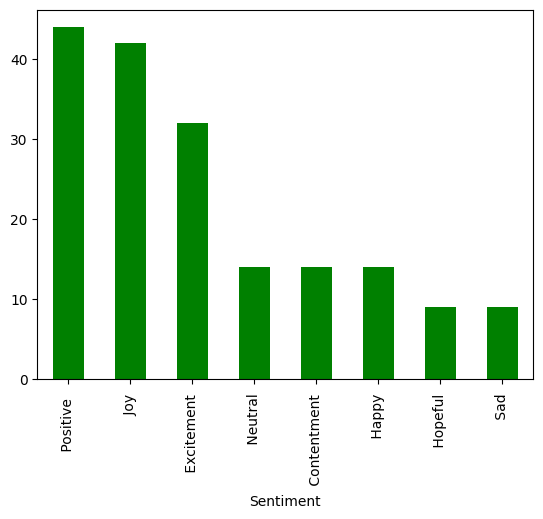

In [ ]:
sentiment_df['Sentiment'].value_counts().nlargest(8).plot(kind='bar', color=["green"])


In [ ]:
sentiment_text = sentiment_df.copy()
sentiment_text = sentiment_text[['Text','Sentiment']]
sentiment_text.head(3)

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive


In [ ]:
sentiment_df['Sentiment'].value_counts().nlargest(15)


,count
Sentiment,
Positive,44
Joy,42
Excitement,32
Neutral,14
Contentment,14
Happy,14
Hopeful,9
Sad,9
Gratitude,9


In [ ]:
# Replace the emotion with a numerical value for the neural network
sentiment_text['Sentiment'] = sentiment_text['Sentiment'].replace({'Happy' : 0,
                                                                  'Excited' : 1,
                                                                  'Sad' : 2,
                                                                  'Content' : 3,
                                                                  'Neutral' : 4,
                                                                  'Angry' : 5,
                                                                  'Hopeful' : 6,
                                                                  'Proud' : 7,
                                                                  'Grateful' : 8,
                                                                  'Curiosity' : 9,
                                                                  'Compassionate' : 10,
                                                                  'Nostalgic' : 11,
                                                                  'Embarrassed' : 12,
                                                                  'Confused' : 13,
                                                                  'Surprised' : 14}

                                                                 )

In [ ]:
sentiment_text['Sentiment'].value_counts()

,count
Sentiment,
Positive,44
Joy,42
Excitement,32
Neutral,14
Contentment,14
...,...
Adrenaline,1
Harmony,1
ArtisticBurst,1
